<a href="https://colab.research.google.com/github/ZaietsMykytaFIT/DTEU-Machine-Learning-2025-Zaiets/blob/main/Zaiets_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report, confusion_matrix

from sklearn.model_selection import cross_val_score

In [135]:
uploaded = files.upload()

In [136]:
df = pd.read_csv('Cure_The_Princess.csv')
df

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,9.4,2.2,15.8,5.9,29.7,18.7,11.5,13.1,15.3,22.5,10.1,4.7,13.8,0
2334,12.1,7.6,20.6,5.3,18.9,19.1,9.4,11.9,21.8,12.0,26.7,8.4,24.4,1
2335,15.2,33.2,7.2,14.5,16.0,16.7,1.2,32.5,34.5,25.9,3.9,18.0,19.2,1
2336,2.0,17.0,33.2,13.2,29.1,35.5,19.7,30.3,30.7,4.3,15.7,20.5,2.1,1


13 інгрідієнтів, та 1 факт ефективності лікування
Значення, ймовірніше за все, відповідають об'єму кожного інгрідієнта

#Аналіз датасету#

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Phoenix Feather  2338 non-null   float64
 1   Unicorn Horn     2338 non-null   float64
 2   Dragon's Blood   2338 non-null   float64
 3   Mermaid Tears    2338 non-null   float64
 4   Fairy Dust       2338 non-null   float64
 5   Goblin Toes      2338 non-null   float64
 6   Witch's Brew     2338 non-null   float64
 7   Griffin Claw     2338 non-null   float64
 8   Troll Hair       2338 non-null   float64
 9   Kraken Ink       2338 non-null   float64
 10  Minotaur Horn    2338 non-null   float64
 11  Basilisk Scale   2338 non-null   float64
 12  Chimera Fang     2338 non-null   float64
 13  Cured            2338 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 255.8 KB


In [138]:
df.isnull().sum()

,0
Phoenix Feather,0
Unicorn Horn,0
Dragon's Blood,0
Mermaid Tears,0
Fairy Dust,0
Goblin Toes,0
Witch's Brew,0
Griffin Claw,0
Troll Hair,0
Kraken Ink,0


In [139]:
df.duplicated().sum()

np.int64(0)

In [140]:
df.describe()

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,15.365697,10.946749,16.115654,13.627973,15.069504,14.157271,12.328914,14.911206,16.871685,14.890590,10.916125,15.371600,12.084003,0.496578
std,8.669969,7.225162,8.372518,7.545244,8.349340,7.831476,7.709753,8.132678,9.579027,8.014197,7.045195,8.559139,8.047540,0.500095
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.500000,5.300000,9.600000,7.600000,8.625000,7.900000,6.325000,8.400000,8.900000,8.800000,5.200000,8.800000,5.600000,0.000000
50%,14.700000,9.500000,15.800000,13.100000,14.500000,13.500000,11.200000,14.400000,16.300000,14.400000,9.700000,14.800000,10.500000,0.000000
75%,21.300000,15.575000,22.000000,19.000000,20.700000,19.500000,16.900000,20.500000,24.000000,20.400000,15.375000,21.100000,17.275000,1.000000
max,42.100000,34.100000,40.800000,35.800000,40.400000,37.800000,37.300000,39.400000,44.800000,39.500000,33.700000,42.000000,37.800000,1.000000


In [141]:
df['Cured'].value_counts()

,count
Cured,
0,1177
1,1161


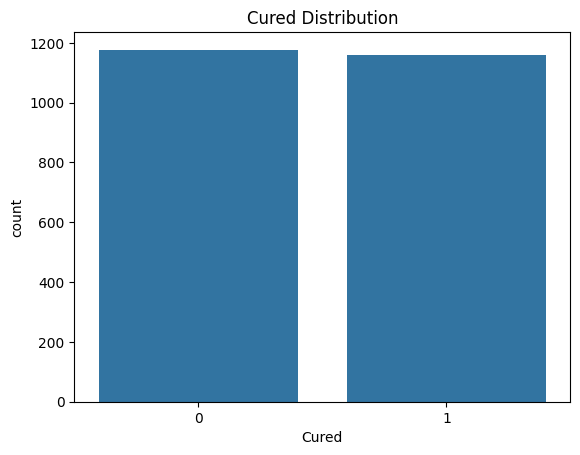

In [142]:
sns.countplot(x='Cured', data=df)
plt.title('Cured Distribution')
plt.show()

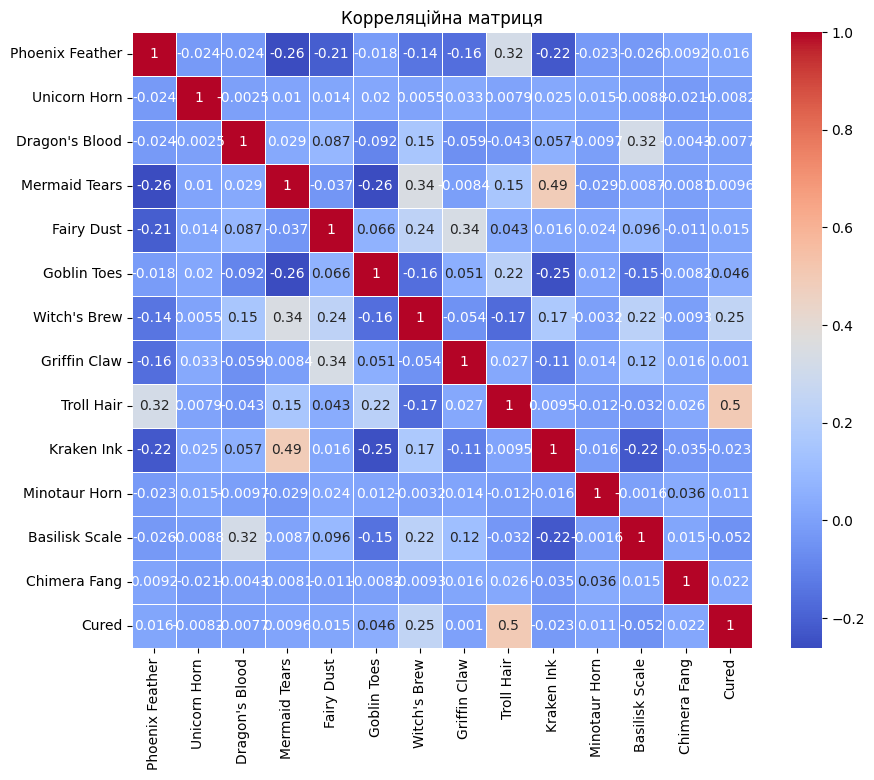

In [143]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляційна матриця')
plt.show()

In [144]:
correlation_with_Cured= correlation_matrix['Cured'].sort_values(ascending=False)
correlation_with_Cured

,Cured
Cured,1.000000
Troll Hair,0.498165
Witch's Brew,0.245993
Goblin Toes,0.046314
Chimera Fang,0.022144
Phoenix Feather,0.015931
Fairy Dust,0.015004
Minotaur Horn,0.011329
Mermaid Tears,0.009619
Griffin Claw,0.001019


#Задача класифіакації датасету#

In [145]:
X = df.drop(columns=['Cured'])
y = df['Cured']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування ознак
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model                Accuracy   Precision  Recall     F1        
------------------------------------------------------------
Logistic Regression  0.8932     0.8932     0.8932     0.8932
Random Forest        0.9380     0.9390     0.9380     0.9380
Gradient Boosting    0.9274     0.9274     0.9274     0.9274
SVC                  0.9594     0.9594     0.9594     0.9594

Cross-validation scores (accuracy):
Logistic Regression  Mean: 0.8684, Std: 0.0235
Random Forest        Mean: 0.9160, Std: 0.0170
Gradient Boosting    Mean: 0.9241, Std: 0.0154
SVC                  Mean: 0.9513, Std: 0.0093


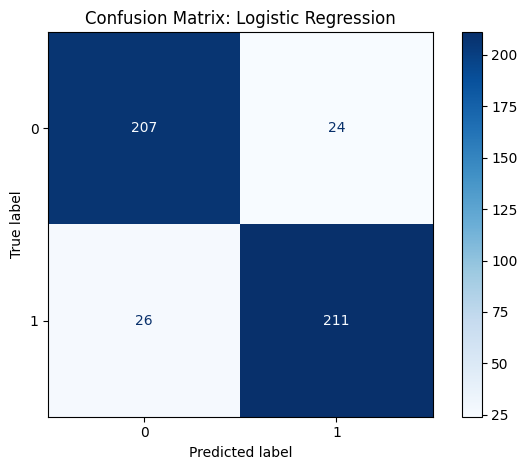

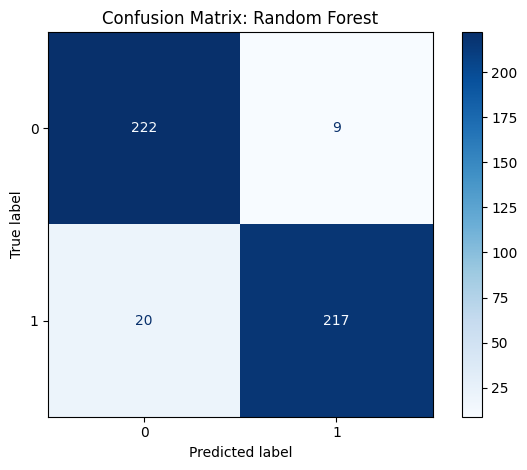

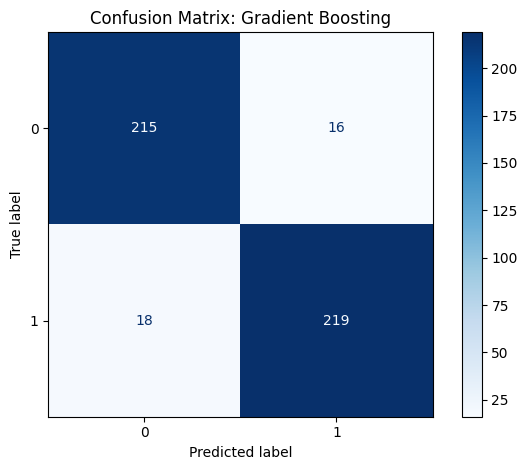

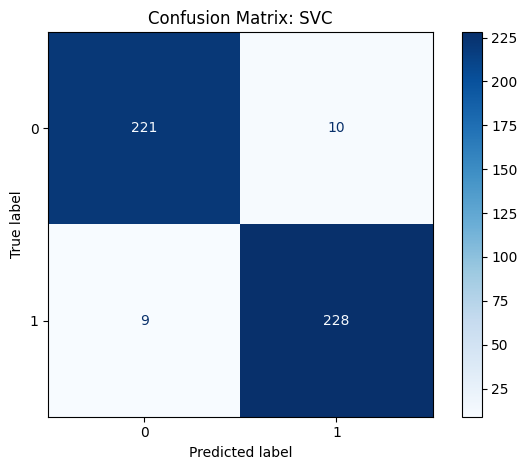

In [146]:
# Моделі, їх метрика та графіки
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVC': SVC()
}

print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10}")
print("-" * 60)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"{name:<20} {acc:.4f}     {prec:.4f}     {rec:.4f}     {f1:.4f}")

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {name}')
    plt.tight_layout()

# Cross-Validation Scores (CVS)
print("\nCross-validation scores (accuracy):")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name:<20} Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")

plt.show()

In [149]:
param_distributions = {
    'Logistic Regression': {
        'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
    },
    'Gradient Boosting': {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    }
}

# Оригінальні моделі
base_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVC': SVC()
}

best_models = {}

print("Підбір параметрів за допомогою RandomizedSearchCV:\n")
for name, model in base_models.items():
    print(f"🔍 {name}")
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions[name],
        n_iter=10,
        cv=5,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )
    search.fit(X_train, y_train)
    best_models[name] = search.best_estimator_

    print(f"Best Parameters: {search.best_params_}")
    print(f"Best Cross-Validated Accuracy: {search.best_score_:.4f}")
    print("-" * 60)

Підбір параметрів за допомогою RandomizedSearchCV:

🔍 Logistic Regression
Best Parameters: {'solver': 'liblinear', 'C': np.float64(29.763514416313132)}
Best Cross-Validated Accuracy: 0.8690
------------------------------------------------------------
🔍 Random Forest
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 30}
Best Cross-Validated Accuracy: 0.9155
------------------------------------------------------------
🔍 Gradient Boosting
Best Parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2}
Best Cross-Validated Accuracy: 0.9439
------------------------------------------------------------
🔍 SVC
Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Best Cross-Validated Accuracy: 0.9428
------------------------------------------------------------


In [152]:
# Use the best model from tuning
model = best_models['SVC']

# Predict on the test set
y_pred = model.predict(X_test)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}).reset_index(drop=True)

# Show 10 random results
print("🔎 Випадкові 10 порівнянь реальних і передбачених значень:")
display(comparison_df.sample(10))

🔎 Випадкові 10 порівнянь реальних і передбачених значень:


,Actual,Predicted
427,0,0
237,0,0
77,1,1
60,1,1
119,0,0
229,0,0
305,0,0
258,1,1
116,1,1
252,1,1


Висновки: Була розв'язана задача класифікації, завантажено датасет, аналіз та підготовка даних, побудовано моделі класифікації, підібрані оптимальні параметри за допомогою RandomizedSearchCV, і виведено порівняння справжніх та прогнозованих результатів для 10 випадкових зразків.